In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [77]:
# Устанавливаем зерно случайности для воспроизводимости
np.random.seed(42)


# 1. Параметры эксперимента

n_A = 5000  # пользователей в группе A (длинное письмо)
n_B = 5000  # пользователей в группе B (короткое письмо)

p_A = 0.035  # вероятность клика в группе A (3.5%)
p_B = 0.05   # вероятность клика в группе B (5.0%)


In [85]:

# 2. Генерация данных

# Случайные 0 и 1: 1 означает, что пользователь кликнул по ссылке
clicks_A = np.random.binomial(1, p_A, n_A)
clicks_B = np.random.binomial(1, p_B, n_B)

In [87]:

# 3. Объединяем в датафрейм

data = pd.DataFrame({
    'group': ['A'] * n_A + ['B'] * n_B,
    'clicked': np.concatenate([clicks_A, clicks_B])
})


In [89]:

# 4. Анализ результата

# Средняя конверсия (CTR) в каждой группе
# ctr_A = data[data['group'] == 'A']['clicked'].mean()

ctr_B = data[data['group'] == 'B']['clicked'].mean()

print(f"Group A CTR: {ctr_A:.4f} ({ctr_A*100:.2f}%)")
print(f"Group B CTR: {ctr_B:.4f} ({ctr_B*100:.2f}%)")


Group A CTR: 0.0350 (3.50%)
Group B CTR: 0.0522 (5.22%)


In [65]:

# 5. t-тест на независимость выборок

t_stat, p_val = ttest_ind(clicks_A, clicks_B)
print(f"T-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Result is statistically significant: short emails perform better.")
else:
    print("⚠️ Result is NOT statistically significant.")

T-statistic: -2.2133
p-value: 0.0269
✅ Result is statistically significant: short emails perform better.


/var/folders/cf/j39pgbzn19v2b0d203153jqh0000gn/T/ipykernel_92127/982143579.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='group', y='clicked', data=data, ci=95)


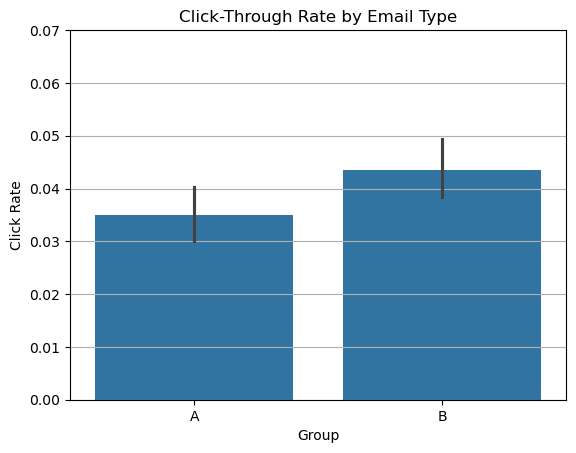

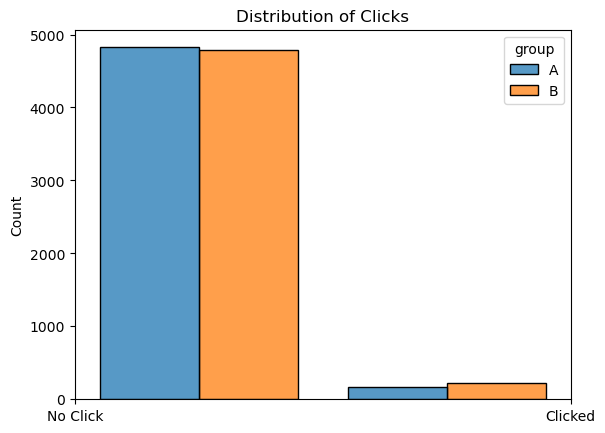

In [67]:

# 6. Визуализация

sns.barplot(x='group', y='clicked', data=data, ci=95)
plt.title("Click-Through Rate by Email Type")
plt.ylabel("Click Rate")
plt.xlabel("Group")
plt.ylim(0, 0.07)
plt.grid(axis='y')
plt.show()

# Распределение кликов по группам
sns.histplot(data=data, x="clicked", hue="group", multiple="dodge", shrink=0.8, bins=2)
plt.title("Distribution of Clicks")
plt.xticks([0, 1], ['No Click', 'Clicked'])
plt.xlabel("")
plt.show()